## First download all of the necessary data

---

Press "Shift + Enter" to run each cell sequentially. Alternatively, you can press "Cmd/Ctrl + F9" to run all cells and then scroll down to bottom cell.

In [1]:
# Download Pre-requisites needed for running the e2e model
%cd /content/

%mkdir model_data
!wget -O /content/model_data/answers_vqa.txt https://dl.fbaipublicfiles.com/pythia/data/answers_vqa.txt
!wget -O /content/model_data/vocabulary_100k.txt https://dl.fbaipublicfiles.com/pythia/data/vocabulary_100k.txt
!wget -O /content/model_data/detectron_model.pth  https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.pth 
!wget -O /content/model_data/pythia.pth https://dl.fbaipublicfiles.com/pythia/pretrained_models/vqa2/pythia_train_val.pth
!wget -O /content/model_data/pythia.yaml https://dl.fbaipublicfiles.com/pythia/pretrained_models/vqa2/pythia_train_val.yml
!wget -O /content/model_data/detectron_model.yaml https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.yaml
!wget -O /content/model_data/detectron_weights.tar.gz https://dl.fbaipublicfiles.com/pythia/data/detectron_weights.tar.gz
!tar xf /content/model_data/detectron_weights.tar.gz

/content
--2021-12-09 07:57:21--  https://dl.fbaipublicfiles.com/pythia/data/answers_vqa.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24768 (24K) [text/plain]
Saving to: ‘/content/model_data/answers_vqa.txt’

/content/model_data 100%[===================>]  24.19K   142KB/s    in 0.2s    

2021-12-09 07:57:22 (142 KB/s) - ‘/content/model_data/answers_vqa.txt’ saved [24768/24768]

--2021-12-09 07:57:22--  https://dl.fbaipublicfiles.com/pythia/data/vocabulary_100k.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 626738 (612K) [text/plain]
Saving to: ‘/content/model_dat

## Now, install some particular dependencies

In [2]:
# Install dependencies
!pip install yacs cython matplotlib
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI
!pip3 install --upgrade Pillow
!pip install gTTS
!pip install pygame
!pip install -q torchaudio omegaconf soundfile
!pip install ffmpeg
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-sd5dbgv_
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-sd5dbgv_
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263922 sha256=132461dede4fffe6e71d83e5ad25091f1ef01dcd104ecf4a00edd229791824ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-hj1tbjve/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.3
    Uninstalling pycocotools-2.0.3:
      Successfully uninstalled pycocotools-2.0.3
     |████████████████████████████████| 3.1 MB 12.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

     |████████████████████████████████| 18.3 MB 35 kB/s 
     |████████████████████████████████| 74 kB 2.7 MB/s 
     |████████████████████████████████| 112 kB 29.8 MB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=9a39551164de5a8e722b1e60d0af16158b89b47a6e2605813bb3edb3bbcebf3b
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional

## Install MMF now

In [3]:
%cd /content/
%rm -rf mmf
!git clone https://github.com/facebookresearch/mmf.git mmf
%cd /content/mmf
# Don't modify torch version
!sed -i '/torch/d' requirements.txt
!pip install -e .
import sys
sys.path.append("/content/mmf")

/content
Cloning into 'mmf'...
remote: Enumerating objects: 22793, done.
remote: Counting objects: 100% (2736/2736), done.
remote: Compressing objects: 100% (1051/1051), done.
remote: Total 22793 (delta 1754), reused 2287 (delta 1405), pack-reused 20057
Receiving objects: 100% (22793/22793), 17.01 MiB | 17.83 MiB/s, done.
Resolving deltas: 100% (14570/14570), done.
/content/mmf
Obtaining file:///content/mmf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 74 kB 2.4 MB/s 
     |████████████████████████████████| 869 kB 30.9 MB/s 
     |████████████████████████████████| 3.0 MB 40.6 MB/s 
     |████████████████████████████████| 2.8 MB 30.8 MB/s 
     |████████████████████████████████| 69 kB 6.8 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 1.5 MB 37.6 MB/s 
     |█

## Install maskrcnn-benchmark now

In [4]:
# Install maskrcnn-benchmark to extract detectron features
%cd /content
!git clone https://gitlab.com/meetshah1995/vqa-maskrcnn-benchmark.git
%cd /content/vqa-maskrcnn-benchmark
# Compile custom layers and build mask-rcnn backbone
!python setup.py build
!python setup.py develop
sys.path.append('/content/vqa-maskrcnn-benchmark')

/content
Cloning into 'vqa-maskrcnn-benchmark'...
remote: Enumerating objects: 730, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 730 (delta 0), reused 0 (delta 0), pack-reused 729
Receiving objects: 100% (730/730), 3.77 MiB | 5.97 MiB/s, done.
Resolving deltas: 100% (391/391), done.
/content/vqa-maskrcnn-benchmark
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/maskrcnn_benchmark
copying maskrcnn_benchmark/__init__.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark
creating build/lib.linux-x86_64-3.7/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/__init__.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/inference.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/trainer.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark/engine
creating build/lib.linux-x86_64-3.7/maskrcnn_benchmark/layers
copying ma

In [5]:
#cat imports.py
!pip install sentencepiece
!pip install numpy
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning

     |████████████████████████████████| 1.2 MB 11.1 MB/s 
  Cloning https://github.com/PyTorchLightning/pytorch-lightning to /tmp/pip-req-build-1ep_qey8
  Running command git clone -q https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-req-build-1ep_qey8
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 829 kB 12.7 MB/s 
     |████████████████████████████████| 132 kB 31.3 MB/s 
     |████████████████████████████████| 332 kB 52.6 MB/s 
     |████████████████████████████████| 1.1 MB 46.1 MB/s 
     |████████████████████████████████| 271 kB 54.4 MB/s 
     |████████████████████████████████| 192 kB 51.8 MB/s 
     |████████████████████████████████| 160 kB 48.6 MB/s 
  Created wheel for pytorch-lightning: filename=pytorch_lightning-1.6.0.dev0-py3-none-any.whl size=520881 sha256=b5f628488f6e37955452432ade1e

## Demo

The class handles everything from feature extraction, token extraction and predicting the answer

In [1]:
%cd /content/
import yaml
import cv2
import torch
import requests
import numpy as np
import gc
import torch.nn.functional as F
import pandas as pd


import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
from IPython.display import display, HTML, clear_output
from ipywidgets import widgets, Layout
from io import BytesIO
from argparse import Namespace


from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.layers import nms
from maskrcnn_benchmark.modeling.detector import build_detection_model
from maskrcnn_benchmark.structures.image_list import to_image_list
from maskrcnn_benchmark.utils.model_serialization import load_state_dict


from mmf.datasets.processors.processors import VocabProcessor, VQAAnswerProcessor
from mmf.models.pythia import Pythia
from mmf.common.registry import registry
from mmf.common.sample import Sample, SampleList
from mmf.utils.env import setup_imports
from mmf.utils.configuration import Configuration

setup_imports()

class MMFDemo:
  TARGET_IMAGE_SIZE = [448, 448]
  CHANNEL_MEAN = [0.485, 0.456, 0.406]
  CHANNEL_STD = [0.229, 0.224, 0.225]
  
  def __init__(self):
    self._init_processors()
    self.pythia_model = self._build_pythia_model()
    self.detection_model = self._build_detection_model()
    self.resnet_model = self._build_resnet_model()
    
  def _init_processors(self):
    args = Namespace()
    args.opts = [
        "config=projects/pythia/configs/vqa2/defaults.yaml",
        "datasets=vqa2",
        "model=pythia",
        "evaluation.predict=True"
    ]
    args.config_override = None

    configuration = Configuration(args=args)
    
    config = self.config = configuration.config
    vqa_config = config.dataset_config.vqa2
    text_processor_config = vqa_config.processors.text_processor
    answer_processor_config = vqa_config.processors.answer_processor
    
    text_processor_config.params.vocab.vocab_file = "/content/model_data/vocabulary_100k.txt"
    answer_processor_config.params.vocab_file = "/content/model_data/answers_vqa.txt"
    # Add preprocessor as that will needed when we are getting questions from user
    self.text_processor = VocabProcessor(text_processor_config.params)
    self.answer_processor = VQAAnswerProcessor(answer_processor_config.params)

    registry.register("vqa2_text_processor", self.text_processor)
    registry.register("vqa2_answer_processor", self.answer_processor)
    registry.register("vqa2_num_final_outputs", 
                      self.answer_processor.get_vocab_size())
    
  def _build_pythia_model(self):
    state_dict = torch.load('/content/model_data/pythia.pth')
    model_config = self.config.model_config.pythia
    model_config.model_data_dir = "/content/"
    model = Pythia(model_config)
    model.build()
    model.init_losses()
    
    if list(state_dict.keys())[0].startswith('module') and \
       not hasattr(model, 'module'):
      state_dict = self._multi_gpu_state_to_single(state_dict)
          
    model.load_state_dict(state_dict, strict=False)
    model.to("cuda")
    model.eval()
    
    return model
  
  def _build_resnet_model(self):
    self.data_transforms = transforms.Compose([
        transforms.Resize(self.TARGET_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(self.CHANNEL_MEAN, self.CHANNEL_STD),
    ])
    resnet152 = models.resnet152(pretrained=True)
    resnet152.eval()
    modules = list(resnet152.children())[:-2]
    self.resnet152_model = torch.nn.Sequential(*modules)
    self.resnet152_model.to("cuda")
  
  def _multi_gpu_state_to_single(self, state_dict):
    new_sd = {}
    for k, v in state_dict.items():
        if not k.startswith('module.'):
            raise TypeError("Not a multiple GPU state of dict")
        k1 = k[7:]
        new_sd[k1] = v
    return new_sd
  
  def predict(self, url, question):
    with torch.no_grad():
      detectron_features = self.get_detectron_features(url)
      resnet_features = self.get_resnet_features(url)

      sample = Sample()

      processed_text = self.text_processor({"text": question})
      sample.text = processed_text["text"]
      sample.text_len = len(processed_text["tokens"])

      sample.image_feature_0 = detectron_features
      sample.image_info_0 = Sample({
          "max_features": torch.tensor(100, dtype=torch.long)
      })

      sample.image_feature_1 = resnet_features

      sample_list = SampleList([sample])
      sample_list = sample_list.to("cuda")

      scores = self.pythia_model(sample_list)["scores"]
      scores = torch.nn.functional.softmax(scores, dim=1)
      actual, indices = scores.topk(5, dim=1)

      top_indices = indices[0]
      top_scores = actual[0]

      probs = []
      answers = []

      for idx, score in enumerate(top_scores):
        probs.append(score.item())
        answers.append(
            self.answer_processor.idx2word(top_indices[idx].item())
        )
    
    gc.collect()
    torch.cuda.empty_cache()
    
    return probs, answers
    
  
  def _build_detection_model(self):

      cfg.merge_from_file('/content/model_data/detectron_model.yaml')
      cfg.freeze()

      model = build_detection_model(cfg)
      checkpoint = torch.load('/content/model_data/detectron_model.pth', 
                              map_location=torch.device("cpu"))

      load_state_dict(model, checkpoint.pop("model"))

      model.to("cuda")
      model.eval()
      return model
  
  def get_actual_image(self, image_path):
      if image_path.startswith('http'):
          path = requests.get(image_path, stream=True).raw
      else:
          path = image_path
      
      return path

  def _image_transform(self, image_path):
      path = self.get_actual_image(image_path)

      img = Image.open(path)
      im = np.array(img).astype(np.float32)
      im = im[:, :, ::-1]
      im -= np.array([102.9801, 115.9465, 122.7717])
      im_shape = im.shape
      im_size_min = np.min(im_shape[0:2])
      im_size_max = np.max(im_shape[0:2])
      im_scale = float(800) / float(im_size_min)
      # Prevent the biggest axis from being more than max_size
      if np.round(im_scale * im_size_max) > 1333:
           im_scale = float(1333) / float(im_size_max)
      im = cv2.resize(
           im,
           None,
           None,
           fx=im_scale,
           fy=im_scale,
           interpolation=cv2.INTER_LINEAR
       )
      img = torch.from_numpy(im).permute(2, 0, 1)
      return img, im_scale


  def _process_feature_extraction(self, output,
                                 im_scales,
                                 feat_name='fc6',
                                 conf_thresh=0.2):
      batch_size = len(output[0]["proposals"])
      n_boxes_per_image = [len(_) for _ in output[0]["proposals"]]
      score_list = output[0]["scores"].split(n_boxes_per_image)
      score_list = [torch.nn.functional.softmax(x, -1) for x in score_list]
      feats = output[0][feat_name].split(n_boxes_per_image)
      cur_device = score_list[0].device

      feat_list = []

      for i in range(batch_size):
          dets = output[0]["proposals"][i].bbox / im_scales[i]
          scores = score_list[i]

          max_conf = torch.zeros((scores.shape[0])).to(cur_device)

          for cls_ind in range(1, scores.shape[1]):
              cls_scores = scores[:, cls_ind]
              keep = nms(dets, cls_scores, 0.5)
              max_conf[keep] = torch.where(cls_scores[keep] > max_conf[keep],
                                           cls_scores[keep],
                                           max_conf[keep])

          keep_boxes = torch.argsort(max_conf, descending=True)[:100]
          feat_list.append(feats[i][keep_boxes])
      return feat_list

  def masked_unk_softmax(self, x, dim, mask_idx):
      x1 = F.softmax(x, dim=dim)
      x1[:, mask_idx] = 0
      x1_sum = torch.sum(x1, dim=1, keepdim=True)
      y = x1 / x1_sum
      return y
   
  def get_resnet_features(self, image_path):
      path = self.get_actual_image(image_path)
      img = Image.open(path).convert("RGB")
      img_transform = self.data_transforms(img)
      
      if img_transform.shape[0] == 1:
        img_transform = img_transform.expand(3, -1, -1)
      img_transform = img_transform.unsqueeze(0).to("cuda")
      
      features = self.resnet152_model(img_transform).permute(0, 2, 3, 1)
      features = features.view(196, 2048)
      return features
    
  def get_detectron_features(self, image_path):
      im, im_scale = self._image_transform(image_path)
      img_tensor, im_scales = [im], [im_scale]
      current_img_list = to_image_list(img_tensor, size_divisible=32)
      current_img_list = current_img_list.to('cuda')
      with torch.no_grad():
          output = self.detection_model(current_img_list)
      feat_list = self._process_feature_extraction(output, im_scales, 
                                                  'fc6', 0.2)
      return feat_list[0]
    

/content


### If the command below fails with 'CUDNN_EXECUTION_FAILED', try rerunning the cell

In [2]:
demo = MMFDemo()

/usr/local/lib/python3.7/dist-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_USER_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/omegaconf/resolvers/__init__.py:13: UserWarning: The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573
  "The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573"
/usr/local/lib/python3.7/dist-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_LOG_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_REPORT_DIR,` some elements are missing: please replace them with empty quoted st

## Use the text fields below to ask a question on an image

Image URL can be any http/https URL. We show top 5 predictions from MMF. Confidence shows how confident MMF model was about a particular prediction.

In [3]:
pip install pydub

In [4]:
!pip install ffmpeg-python

In [5]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg



AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  process = (ffmpeg
    .input('pipe:0')
    .output('file.wav', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

Text(value='http://vqa.cloudcv.org/media/test2014/COCO_test2014_000000323596.jpg', description='Image URL')

Text(value='hellong', description='Question')

Button(description='Ask MMF!', style=ButtonStyle())

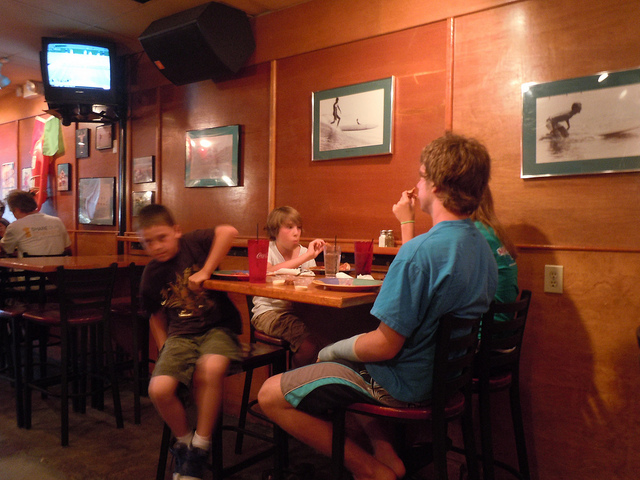

,Prediction,Confidence
0,yes,67.844349
1,no,22.869071
2,on,1.166473
3,not sure,0.467970
4,flat,0.316284


In [11]:
from gtts import gTTS
import pygame
import os
import torch
import zipfile
import torchaudio
from glob import glob
from pydub import AudioSegment
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import IPython


def init_widgets(url, question):
  image_text = widgets.Text(
    description="Image URL", layout=Layout(minwidth="70%")
  )
  question_text = widgets.Text(
      description="Question", layout=Layout(minwidth="70%")
  )

  image_text.value = url
  question_text.value = question
  submit_button = widgets.Button(description="Ask MMF!")

  display(image_text)
  display(question_text)
  display(submit_button)

  submit_button.on_click(lambda b: on_button_click(
      b, image_text, question_text
  ))
  
  return image_text, question_text
  
def on_button_click(b, image_text, question_text):
  clear_output()
  image_path = demo.get_actual_image(image_text.value)
  image = Image.open(image_path)
  
  scores, predictions = demo.predict(image_text.value, question_text.value)
  scores = [score * 100 for score in scores]
  df = pd.DataFrame({
      "Prediction": predictions,
      "Confidence": scores
  })
  language = 'en'
  myobj = gTTS(text=predictions[0], lang=language, slow=False)
  myobj.save("output.mp3")
  '''
  pygame.mixer.init()
  pygame.mixer.music.load('output.mp3')
  pygame.mixer.music.play()
  '''
  init_widgets(image_text.value, question_text.value)
  display(image)
  display(HTML(df.to_html()))
  display(Audio("output.mp3", autoplay=True))
s = ""  

device = torch.device('cpu')  # gpu also works, but our models are fast enough for CPU

model, decoder, utils = torch.hub.load(repo_or_dir='snakers4/silero-models',
                                       model='silero_stt',
                                       language='en', # also available 'de', 'es'
                                       device=device)
(read_batch, split_into_batches,
 read_audio, prepare_model_input) = utils  # see function signature for details
get_audio()
test_files = glob('file.wav')
batches = split_into_batches(test_files, batch_size=10)
input = prepare_model_input(read_batch(batches[0]),
                            device=device)

output = model(input)
for example in output:
    s = decoder(example.cpu())


image_text, question_text = init_widgets(
    "VizWiz_val_00028000.jpg", 
    s
)